In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *


In [17]:
temp = pd.read_csv('/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp.csv')

In [18]:
temp.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
temp.rename(columns={'date': 'Date'}, inplace=True)

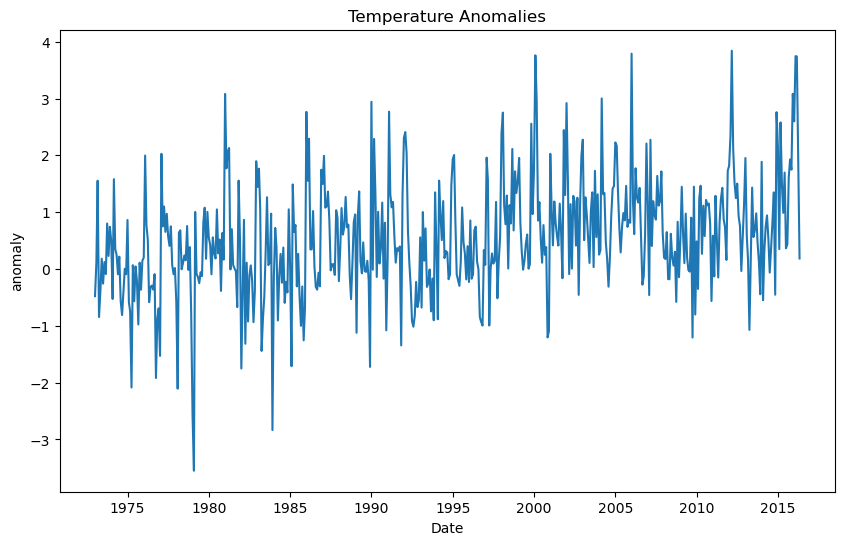

In [20]:
# plot anamolies
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)

# filter out dates from 1973
temp = temp[temp.index.year >= 1973]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='anomaly', data=temp)
plt.title('Temperature Anomalies')
plt.show()

In [ ]:
# next steps: use moving av erage to smooth out temperature, find other things this could be correlated with other things, 
# smooth both consumption and anomaly over the long term

In [21]:
temp['anomaly_squared'] = temp['anomaly'] ** 2

# linear regression
X = temp.index.values.astype(float).reshape(-1, 1)
y = temp['anomaly'].values

test_linear_model(X, y)

The p-value for the F-test is: nan.
The model is not statistically significant.


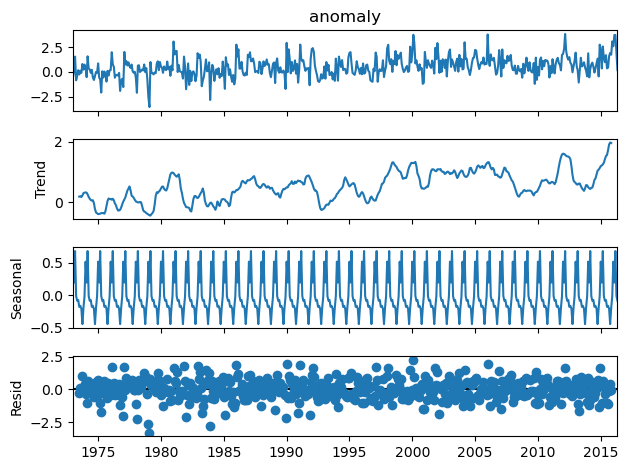

In [22]:
# seasonal decomposition for temperature
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(temp['anomaly'], model='additive', period=12)
decomposition.plot()
plt.show()

trend = decomposition.trend

In [11]:
temp_trend = pd.DataFrame(trend)

<Axes: xlabel='Date', ylabel='anomaly'>

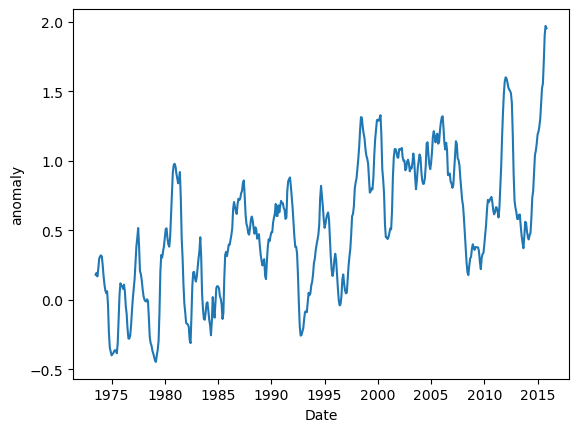

In [23]:
sns.lineplot(y=temp_trend['anomaly'],x=temp_trend['Date'])

In [24]:
# make date a column
temp_trend.reset_index(inplace=True)
temp_trend.rename(columns={'trend': 'anomaly'}, inplace=True)
temp_trend.dropna(inplace=True)

The p-value for the F-test is: 5.81730926425629e-64.
The model is statistically significant.


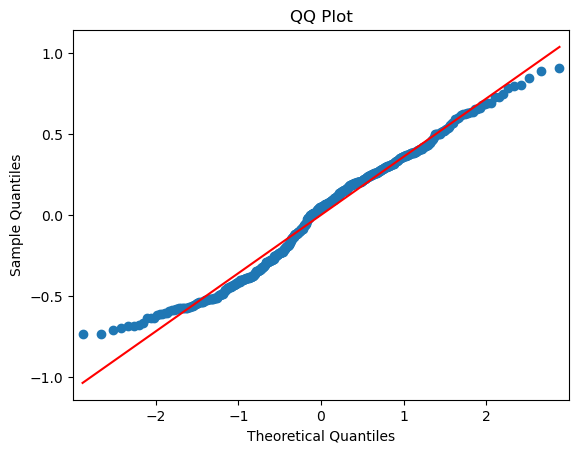

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 14.049289456677975, 'Chi^2 two-tail prob.': 0.0008896835428148598, 'Skew': -0.006733936710959897, 'Kurtosis': 2.186206073134171}


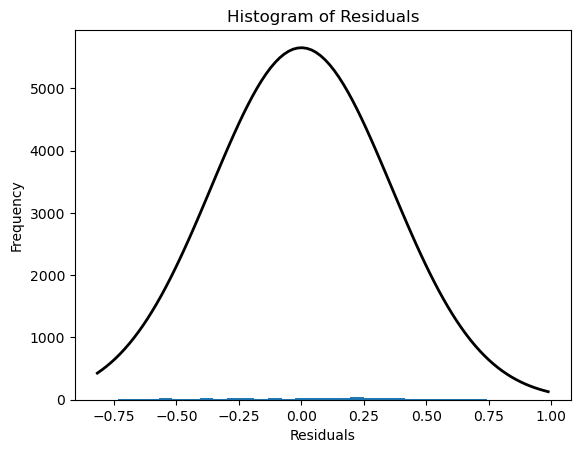

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 19.616034868057056, 'p-value': 9.467132683014118e-06, 'f-value': 20.32214045963596, 'f p-value': 8.135129600575693e-06}


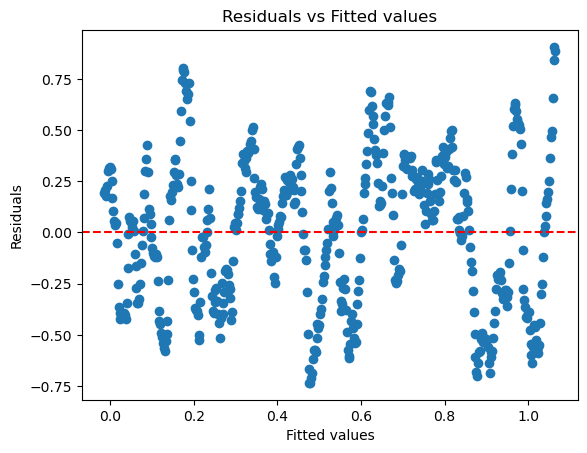

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 0.0507577077872432, 'p-value': 0.9595185917056597}


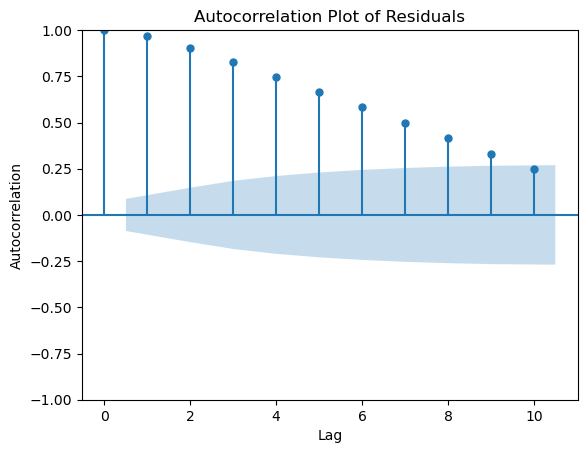

The residuals are not autocorrelated.


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [26]:
X = temp_trend.index.values.astype(float).reshape(-1, 1)
y = temp_trend['anomaly'].values
test_linear_model(X, y)

In [27]:
temp_trend.to_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp_trend.csv")

In [ ]:
emi_com = pd.read_csv('emission_consumption.csv')
emi_com.head()
emi_com['Date'] = pd.to_datetime(emi_com['Date'])

In [ ]:
# inner join temp and emi_com on date
df = pd.merge(temp_trend, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18815 entries, 0 to 18814
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18815 non-null  datetime64[ns]
 1   anomaly                   18815 non-null  float64       
 2   EIA_ID                    18815 non-null  object        
 3   Consumption (kBarrel)     18815 non-null  float64       
 4   Column_Order_x            18815 non-null  int64         
 5   Energy Type               18815 non-null  object        
 6   Energy Class              18815 non-null  object        
 7   Sector                    18815 non-null  object        
 8   Emission (Mton Co2)       18815 non-null  float64       
 9   Column_Order_y            18815 non-null  int64         
 10  Emission per Consumption  18287 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
emi_com

,EIA_ID,Date,Consumption (kBarrel),Column_Order_x,Energy Type,Energy Class,Sector,Emission (Mton Co2),Column_Order_y,Emission per Consumption
0,DFRCPUS,1973-01-01,1.706943e+03,1,Distillate Fuel Oil,Petroleum,Residential,22.796,3,1.335487e-02
1,PCEIZUS,1973-01-01,6.721000e+00,11,Petroleum Coke,Petroleum,Electric Power,0.128,4,1.904479e-02
2,NGEIPUS,1973-01-01,3.988980e+07,11,Natural Gas,Natural Gas,Electric Power,12.163,2,3.049150e-07
3,DKEIZUS,1973-01-01,1.808870e+02,10,Distillate Fuel Oil,Petroleum,Electric Power,2.397,3,1.325137e-02
4,PAACPUS,1973-01-01,8.508201e+03,9,Total,Petroleum,Transportation,101.775,10,1.196199e-02
...,...,...,...,...,...,...,...,...,...,...
22578,MGICPUS,2023-11-01,1.438320e+02,9,Motor Gasoline,Petroleum,Industrial,1.426,8,9.914345e-03
22579,PCICPUS,2023-11-01,4.111640e+02,10,Petroleum Coke,Petroleum,Industrial,7.556,9,1.837710e-02
22580,RFICPUS,2023-11-01,2.018500e+01,11,Residual Fuel Oil,Petroleum,Industrial,0.278,10,1.377260e-02
22581,DFACPUS,2023-11-01,2.983706e+03,2,Distillate Fuel Oil,Petroleum,Transportation,37.627,4,1.261083e-02


In [ ]:
emi_com = emi_com[["Date","Consumption (kBarrel)", "Energy Class", "Sector", "Emission (Mton Co2)"]] 

In [ ]:
emi_com

,Date,Consumption (kBarrel),Energy Class,Sector,Emission (Mton Co2)
0,1973-01-01,1.706943e+03,Petroleum,Residential,22.796
1,1973-01-01,6.721000e+00,Petroleum,Electric Power,0.128
2,1973-01-01,3.988980e+07,Natural Gas,Electric Power,12.163
3,1973-01-01,1.808870e+02,Petroleum,Electric Power,2.397
4,1973-01-01,8.508201e+03,Petroleum,Transportation,101.775
...,...,...,...,...,...
22578,2023-11-01,1.438320e+02,Petroleum,Industrial,1.426
22579,2023-11-01,4.111640e+02,Petroleum,Industrial,7.556
22580,2023-11-01,2.018500e+01,Petroleum,Industrial,0.278
22581,2023-11-01,2.983706e+03,Petroleum,Transportation,37.627


In [ ]:
# collapse sectors into 1 
# find emission per consumption 

emi_com = emi_com.groupby(['Date','Energy Class']).sum(['Consumption (kBarrel)', 'Emission (Mton Co2)'])


In [ ]:
#emi_com['Emi/Con'] = emi_com['Emission (Mton Co2)'] / emi_com['Consumption (kBarrel)']

In [ ]:
emi_com = emi_com.reset_index()

In [ ]:
emi_com.index = emi_com['Date']

In [ ]:
emi_com = emi_com.drop(['Date'],axis=1)

In [ ]:
df = emi_com.join(temp,on='Date',how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1551 entries, 1973-01-01 to 2016-05-01
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Energy Class           1551 non-null   object 
 1   Consumption (kBarrel)  1551 non-null   float64
 2   Emission (Mton Co2)    1551 non-null   float64
 3   Emi/Con                1551 non-null   float64
 4   anomaly                1551 non-null   float64
 5   anomaly_squared        1551 non-null   float64
dtypes: float64(5), object(1)
memory usage: 84.8+ KB


<Axes: xlabel='anomaly', ylabel='Emi/Con'>

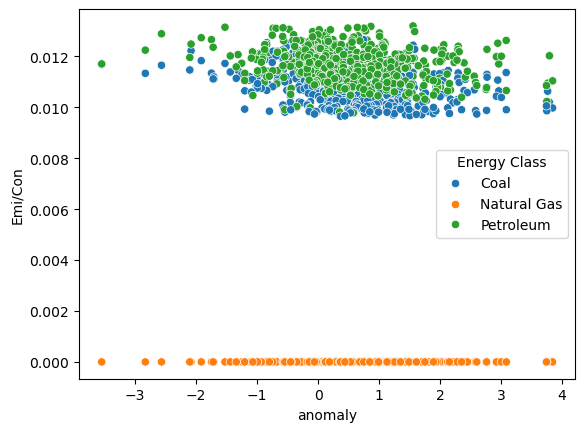

In [ ]:
sns.scatterplot(y=df["Emi/Con"], x=df["anomaly"], hue=df['Energy Class'])

In [ ]:
df

,Energy Class,Consumption (kBarrel),Emission (Mton Co2),Emi/Con,anomaly,anomaly_squared
Date,,,,,,
1973-01-01,Coal,8.765922e+03,109.679,1.251198e-02,-0.478,0.228484
1973-01-01,Natural Gas,2.599361e+08,121.365,4.669033e-07,-0.478,0.228484
1973-01-01,Petroleum,3.527884e+04,461.050,1.306874e-02,-0.478,0.228484
1973-02-01,Coal,7.864562e+03,98.847,1.256866e-02,0.118,0.013924
1973-02-01,Natural Gas,2.415668e+08,109.954,4.551701e-07,0.118,0.013924
...,...,...,...,...,...,...
2016-04-01,Natural Gas,2.507148e+08,110.012,4.387934e-07,1.889,3.568321
2016-04-01,Petroleum,3.677198e+04,385.531,1.048437e-02,1.889,3.568321
2016-05-01,Coal,9.301667e+03,92.015,9.892313e-03,0.186,0.034596


<Axes: >

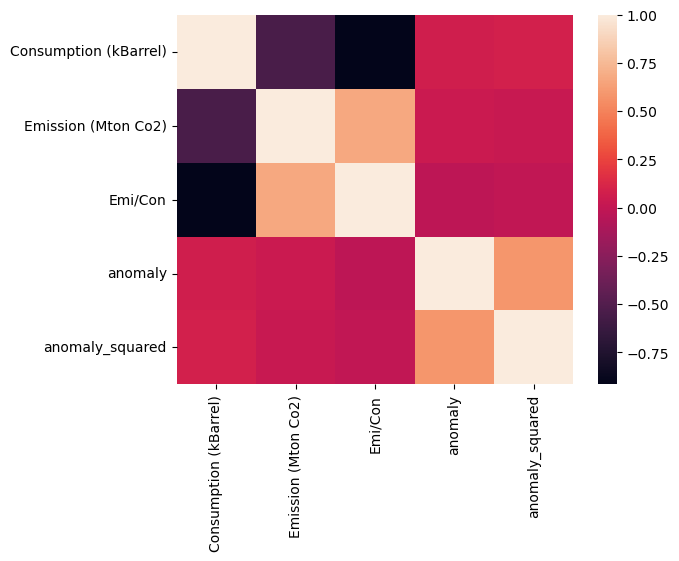

In [ ]:
sns.heatmap(df[['Consumption (kBarrel)','Emission (Mton Co2)',	'Emi/Con',	'anomaly',	'anomaly_squared']].corr())

In [ ]:
df['Energy Class'].loc[df['Energy Class']== "Natural Gas"] = None
df['Energy Class'].dropna()

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_60949/3373147670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energy Class'].loc[df['Energy Class']== "Natural Gas"] = None


,Energy Class,Consumption (kBarrel),Emission (Mton Co2),Emi/Con,anomaly,anomaly_squared
Date,,,,,,
1973-01-01,Coal,8.765922e+03,109.679,1.251198e-02,-0.478,0.228484
1973-01-01,None,2.599361e+08,121.365,4.669033e-07,-0.478,0.228484
1973-01-01,Petroleum,3.527884e+04,461.050,1.306874e-02,-0.478,0.228484
1973-02-01,Coal,7.864562e+03,98.847,1.256866e-02,0.118,0.013924
1973-02-01,None,2.415668e+08,109.954,4.551701e-07,0.118,0.013924
...,...,...,...,...,...,...
2016-04-01,None,2.507148e+08,110.012,4.387934e-07,1.889,3.568321
2016-04-01,Petroleum,3.677198e+04,385.531,1.048437e-02,1.889,3.568321
2016-05-01,Coal,9.301667e+03,92.015,9.892313e-03,0.186,0.034596


In [ ]:
df['Energy Class'].dropna()

Date
1973-01-01         Coal
1973-01-01    Petroleum
1973-02-01         Coal
1973-02-01    Petroleum
1973-03-01         Coal
                ...    
2016-03-01    Petroleum
2016-04-01         Coal
2016-04-01    Petroleum
2016-05-01         Coal
2016-05-01    Petroleum
Name: Energy Class, Length: 1030, dtype: object

In [ ]:
df

,Energy Class,Consumption (kBarrel),Emission (Mton Co2),Emi/Con,anomaly,anomaly_squared
Date,,,,,,
1973-01-01,Coal,8.765922e+03,109.679,1.251198e-02,-0.478,0.228484
1973-01-01,None,2.599361e+08,121.365,4.669033e-07,-0.478,0.228484
1973-01-01,Petroleum,3.527884e+04,461.050,1.306874e-02,-0.478,0.228484
1973-02-01,Coal,7.864562e+03,98.847,1.256866e-02,0.118,0.013924
1973-02-01,None,2.415668e+08,109.954,4.551701e-07,0.118,0.013924
...,...,...,...,...,...,...
2016-04-01,None,2.507148e+08,110.012,4.387934e-07,1.889,3.568321
2016-04-01,Petroleum,3.677198e+04,385.531,1.048437e-02,1.889,3.568321
2016-05-01,Coal,9.301667e+03,92.015,9.892313e-03,0.186,0.034596


<Axes: xlabel='Consumption (kBarrel)', ylabel='Emission (Mton Co2)'>

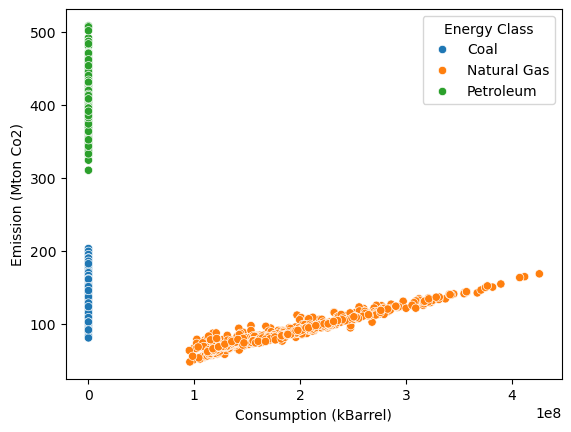

In [ ]:
sns.scatterplot(x = df['Consumption (kBarrel)'],y=df['Emission (Mton Co2)'],hue=df['Energy Class'])

Text(0.5, 1.0, 'Temperature vs Emission by Petroleum in January')

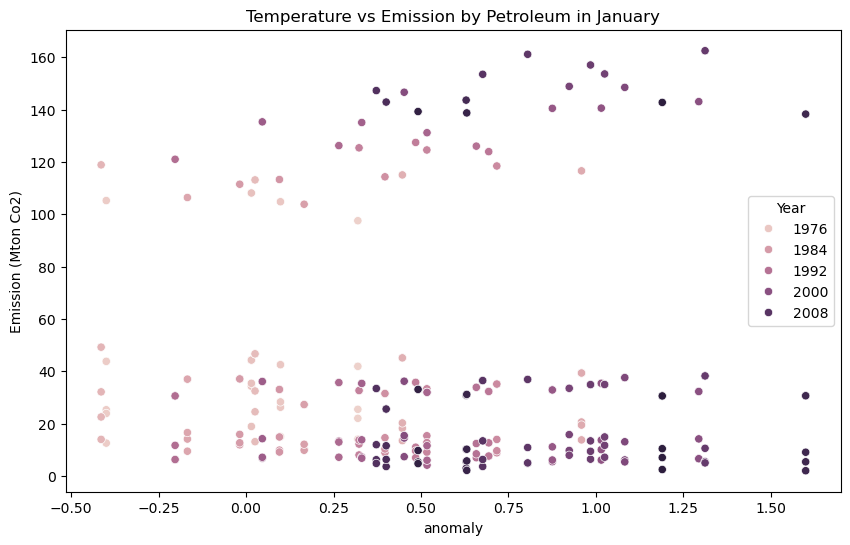

In [ ]:
# plot temperature vs emission by petroleum in january

petroleum = df[df['Energy Class'] == 'Petroleum']
petroleum = petroleum[petroleum['Energy Type'] == 'Total']
petroleum['Month'] = pd.DatetimeIndex(petroleum['Date']).month_name()
petroleum = petroleum[petroleum['Month'] == 'January']
petroleum['Year'] = pd.DatetimeIndex(petroleum['Date']).year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='anomaly', y='Emission (Mton Co2)', data=petroleum, hue='Year')
plt.title('Temperature vs Emission by Petroleum in January')

In [ ]:
petroleum

,level_0,index,Date,anomaly,EIA_ID,Consumption (kBarrel),Column_Order_x,Energy Type,Energy Class,Sector,Emission (Mton Co2),Column_Order_y,Emission per Consumption,Month,Year
4,1470,1470,1973-01-01,-0.274042,PAACPUS,8508.201,9,Total,Petroleum,Transportation,101.775,10,0.011962,January,1973
18,1470,1470,1973-01-01,-0.274042,PAICPUS,4381.954,13,Total,Petroleum,Industrial,42.325,12,0.009659,January,1973
19,1470,1470,1973-01-01,-0.274042,HLICPUS,1029.905,6,Total,Petroleum,Industrial,42.325,12,0.041096,January,1973
21,1470,1470,1973-01-01,-0.274042,PACCPUS,1329.395,11,Total,Petroleum,Commercial,17.412,9,0.013098,January,1973
28,1470,1470,1973-01-01,-0.274042,PARCPUS,2686.283,4,Total,Petroleum,Residential,31.236,6,0.011628,January,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,1974,1974,2015-01-01,1.189583,PAACPUS,12735.088,9,Total,Petroleum,Transportation,142.755,10,0.011210,January,2015
18643,1974,1974,2015-01-01,1.189583,PAEIZUS,158.763,13,Total,Petroleum,Electric Power,2.480,6,0.015621,January,2015
18651,1974,1974,2015-01-01,1.189583,PAICPUS,4659.386,13,Total,Petroleum,Industrial,30.603,12,0.006568,January,2015
18657,1974,1974,2015-01-01,1.189583,PARCPUS,1067.448,4,Total,Petroleum,Residential,10.456,6,0.009795,January,2015


In [ ]:
import sys
sys.path.append('..')
from LinearModel import *

In [ ]:
X = petroleum['Emission (Mton Co2)']
y = petroleum['anomaly']
test_linear_model(X, y)

The p-value for the F-test is: 0.7011121205884043.
The model is not statistically significant.


In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic 